PC50_Parth Salke

11.Read the Chemicals in Cosmetics dataset and perform following operations on data.
●	Import data to pandas dataframe and clean the data, including standardizing the ProductName, CompanyName, and ChemicalName columns
●	What is the most frequently reported chemical? Create plot for visualization.
●	Which are highest chemicals reported? Is Titanium Dioxide very harmful? Group the data by the product ID and primary category, and plot out a chart and find the answers.
●	Plot the Histogram of products containing very harmful chemical to total products reported.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv("C:\\Users\\Parth Salke\\Downloads\\Datasets\\chemicals-in-cosmetics.csv")

In [11]:
data.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [12]:
print("Number of records: "+str(len(data.index)))

Number of records: 112870


In [17]:
data.shape

(112870, 16)

In [13]:
data.isnull().sum()

CDPHId                         0
ProductName                    0
CSFId                      33683
CSF                        34107
CompanyId                      0
CompanyName                    0
BrandName                    212
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6289
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate           99964
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       109949
ChemicalCount                  0
dtype: int64

In [14]:
data = data.drop(labels="CSFId", axis=1)

In [15]:
data = data.drop(labels="CSF", axis=1)
data = data.drop(labels="BrandName", axis=1)
data = data.drop(labels="CasNumber", axis=1)
data = data.drop(labels="DiscontinuedDate", axis=1)
data = data.drop(labels="ChemicalDateRemoved", axis=1)

In [16]:
data.isnull().sum()

CDPHId                    0
ProductName               0
CompanyId                 0
CompanyName               0
PrimaryCategoryId         0
PrimaryCategory           0
SubCategoryId             0
SubCategory               0
CasId                     0
ChemicalId                0
ChemicalName              0
InitialDateReported       0
MostRecentDateReported    0
ChemicalCreatedAt         0
ChemicalUpdatedAt         0
ChemicalCount             0
dtype: int64

In [18]:
data['ChemicalName'].value_counts().size

123

In [19]:
import seaborn as sns

<Figure size 1440x2160 with 0 Axes>

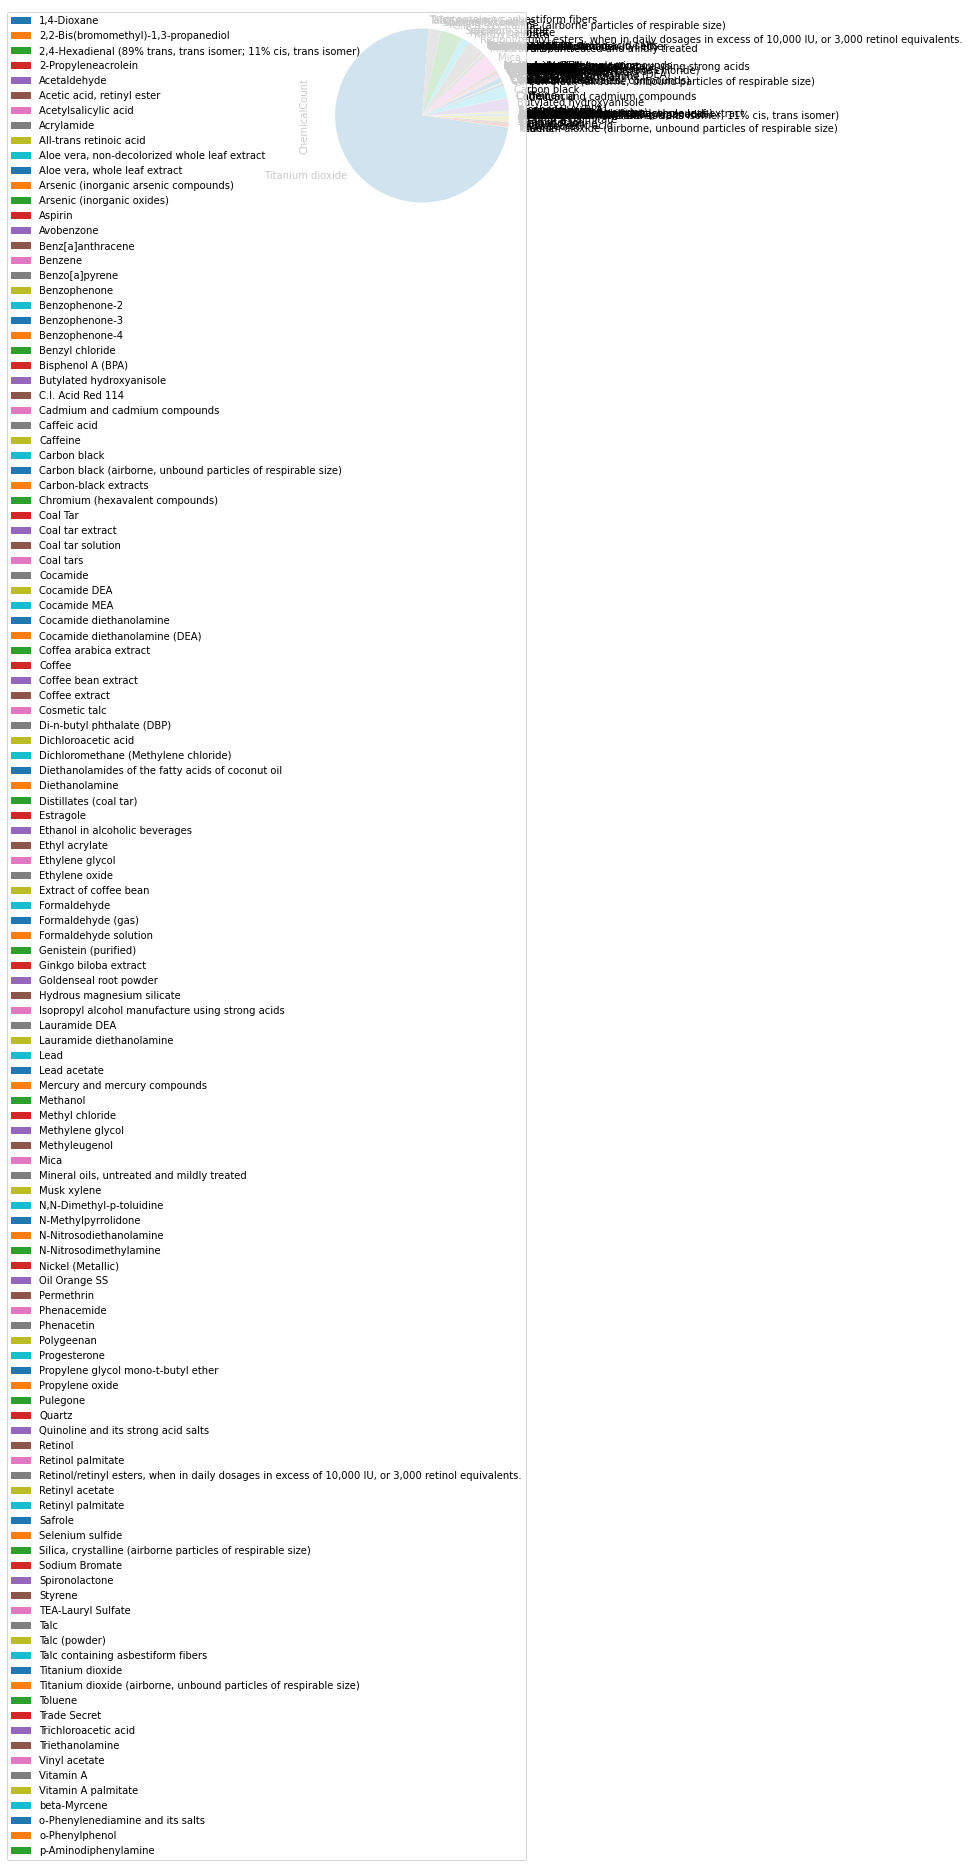

In [20]:
plt.figure(figsize = (20,30))
data.groupby(['ChemicalName']).sum().plot(kind='pie', y='ChemicalCount')

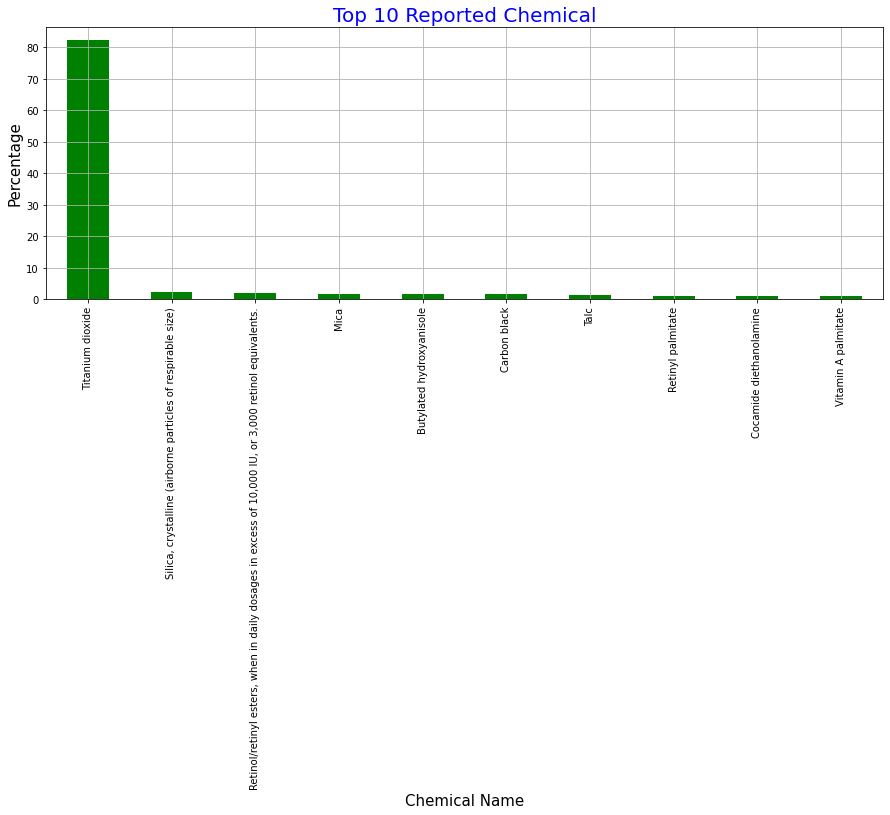

In [21]:
plt.figure(figsize=[15,5])
(data[data.ChemicalCount > 0]['ChemicalName'].value_counts(normalize=True) * 100)[:10].plot(kind='bar', color='green')

plt.ylabel('Percentage', fontdict={'size':15})
plt.xlabel('Chemical Name', fontdict={'size':15})
plt.title('Top 10 Reported Chemical', fontdict={'size':20, 'color':'blue'})

plt.grid()
plt.show()

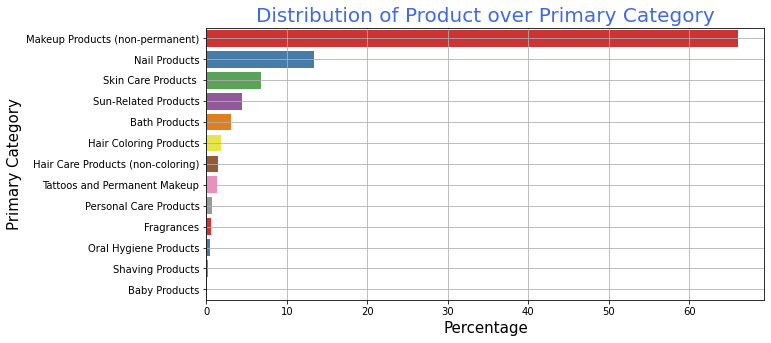

In [23]:
plt.figure(figsize=[10,5])
sns.barplot(x=data['PrimaryCategory'].value_counts(normalize=True) * 100,
            y=data['PrimaryCategory'].value_counts().index, palette='Set1')

plt.xlabel('Percentage', fontdict={'size':15})
plt.ylabel('Primary Category', fontdict={'size':15})
plt.title('Distribution of Product over Primary Category', fontdict={'size':20, 'color':'royalblue'})
plt.grid()
plt.show()

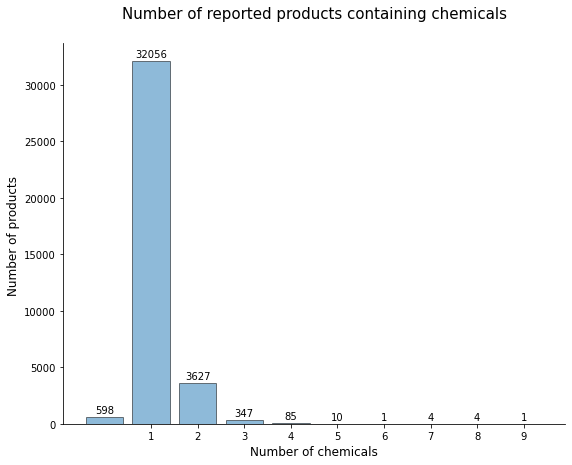

In [24]:
data = data.groupby(['ChemicalCount']).nunique()['CDPHId']

fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
ax.bar(data.index, data.values, align='center', alpha=0.5, edgecolor='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(np.arange(1,10))

for x,y in zip(data.index,data.values):
    plt.annotate(y, (x,y), textcoords="offset points", xytext=(0,4), ha='center') 

ax.set_title('Number of reported products containing chemicals', fontsize=15)
ax.title.set_position([.5, 1.05])
ax.set_xlabel('Number of chemicals', fontsize=12)
ax.set_ylabel('Number of products ', fontsize=12)

plt.show()